# RETAIL CONSUMER SEGMENTATION USING K-MEANS CLUSTERING ALGORITHM

<u>**INTRODUCTION**</u>

For the improvement of business and to improve relative marketing techniques, segmentation of consumers is done. Consumer segmentation generally involves dividing of customers into different groups based on different criteria. In this project the segmentation of customers is done based on RFM analysis technique.

The dataset used in this project is an online retail dataset of a company which mainly sold unique gifts for UK-based and registered non-store online retail and has various transactions occurred between 12/01/2010 and 12/09/2011 with 8 different parameters. The 8 parameters are InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID and Country. 

In this project the customers are categorized based on RFM analysis technique. In RFM nalysis technique R stands for Recency which means how long ago the customer has purchased his last product from the company, F stands for Frequency which means how frequently the customer has been purchasing products from the company and M stands for Monetary which means how much value of products the customer purchased from company.
Based on this definition of RFM the customers are classified into three categories which are:

1. Customers who are recent buyers

2. Customers who are frequent buyers

3. Customers with high amount of transactions. 

This type of classification helps a company to identify it's most valuable customer groups and then can further do analysis of the type of products bought by each group which helps in increasing the market and strategical value of the company.
Once the three factors of RFM are obtained for each customer, k-means clustering algorithm is used for segmentation of customers. K-means clustering algorithm is used as in this algorithm customers can be grouped together into clusters based on the similarities among them. Once the customers are clustered it is easy for an organization to understand, which group of customers are to be focused depending on the business need/idea.


<u>**METHODS**</u>

To start with the required libraries are imported.

In [1]:
# libraries required

import numpy as np
import pandas as pd
import matplotlib as plt
import datetime as dt

import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random
import matplotlib.pyplot as plt
import seaborn as sb


Once the libraries are imported the next step is to load the dataset into environment. Once the dataset is loaded into the environment the structure of the raw dataset is obtained.

In [2]:
# importing csv data

data= pd.read_csv('C:/Users/dell/Downloads/OnlineRetail/OnlineRetail.csv', encoding="ISO-8859-1" ,header=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


The raw dataset has 8 columns with 541909 rows, the 8 columns and their datatypes are defined as follows

1. InvoiceNo is the 6 digit invoice number assigned to each transaction and has datatype as object.

2. StockCode is the 5 digit Product Code number of each item in the stock and has datatype as object.

3. Description is the name of the product with datatype as object.

4. Quantity is the number of products present in each transaction and has datatype as integer.

5. InvoiceDate is the date and time of each transaction made and has datatype as object.

6. UnitPrice is the price of each product and is of datatype float.

7. CustomerID is the unique 5 digit number assigned to each customer and is of datatype float.

8. Country is the name of the country where the customer resides and is of datatype object.

To identify the best model the raw data should be cleansed first. The first step in data cleansing involves identifying and removing null values.


In [3]:
#identifying null values

data.isnull().sum() 
    

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

From the above output, it is observed that there are null values in the columns Description and CustomerID. These columns can be dropped because having customers without customerId would not add to the analysis of RFM method as customer ID is used as the primary distinguisher in clustering groups.

In [4]:
#removing null values

data= data.dropna()
data.shape

(406829, 8)

After removing the null values, the dataset has 8 columns and 406829 rows.

The next step is to change the data type of Invoice date to date datattype. This is necessary step as the InvoiceDate parameter is used in next steps while obtaining the Recency category in RFM analysis.


In [5]:
#converting InvoiceDate datatype

timeformat='%d-%m-%Y %H:%M'
data['InvoiceDate']= pd.to_datetime(data['InvoiceDate'], format=timeformat)

The next step of analysis is to identify the recency, frequency and monetary values of the customers who purchased from the company.

<u>RECENCY:</u>

InvoiceDate is the key parameter in calculating the recency of purchase. Frist the latest transaction date is identified then the difference between the latest transaction date and the transaction date of each customer is used to identify when a customer bought the last item from the company. This identification is mentioned in days and stored under a new column in the existing dataset.

In [6]:
#obtaining Recency

lastDate= max(data['InvoiceDate'])
data['Recency']= lastDate- data['InvoiceDate']
data['Recency']= data['Recency'].dt.days
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0


The output thus obtained displays the last transaction of each product of every customer, inorder to obtain the recent transaction of a customer the recency should be obtained based on latest transaction of each customer i.e; the minimum value of recency for each customer should be obtained. For this the recency of customer which is grouped by customer Id is obtained and stored in a new dataframe.

In [7]:
#creating new dataframe for RFM analysis

RFM= data.groupby('CustomerID')['Recency'].min()
RFM= RFM.reset_index()
RFM

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


<u>FREQUENCY</u>

After the Recency the next factor to be identified is the Frequency. This factor is identified inorder to understand how frequently a customer has purchased products from the company. Frequency is identified by counting the number of invoices present against each customerID, so the key parameters in identifying frequency are CustomerID and InvoiceNo. As per business knowledge it is agreeable that the number of unique values of customerID will be less than the number of unique values of InvoiceNo so the Frequency factor is calculated and stored under a new dataframe.

In [8]:
#obtaining frequency

Frequency= data.groupby('CustomerID')['InvoiceNo'].count()
Frequency= Frequency.reset_index()
Frequency.columns=['CustomerID','Frequency']
Frequency

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


<u>MONETARY</u>

The next step of analysis is identifying the Monetary factor which gives information about how much amount a customer has spent on products purchased from the company. Inorder to obtain the monetary value of each customer first the quantity and price of each invoice should be multiplied and then the total sum of amount is to be calculated for each unique customer ID.

In [9]:
#obtaining Monetary

data['Monetary']= data['Quantity']*data['UnitPrice']
Monetary= data.groupby('CustomerID')['Monetary'].sum()
Monetary= Monetary.reset_index()
Monetary.columns=['CustomerID','Monetary']
Monetary

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


Now all the three factors of RFM analysis are obtained, these three factors are combined into a new dataframe on which the k-means clustering algorithm is applied for segmentation.

In [10]:
#creating new dataframe RFM

RFM=pd.merge(RFM, Frequency, how='inner', on='CustomerID')
RFM=pd.merge(RFM, Monetary, how='inner', on='CustomerID')
RFM

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
...,...,...,...,...
4367,18280.0,277,10,180.60
4368,18281.0,180,7,80.82
4369,18282.0,7,13,176.60
4370,18283.0,3,756,2094.88


In [11]:
#obtaining structure of RFM dataframe

RFM.shape

(4372, 4)

The recency, frequency and monetary values required for RFM segmentation are  thus obtained. These values are combined into a new dataframe with 4 columns named CustomerID, Recency, Frequency and Monetary and has 4372 rows. The next step is to identify if there are any possible outliers present in the obtained dataset. For this, the descriptive statistics of the new dataset is to be obtained. 

In [12]:
#descriptive statistics of RFM 

RFM.describe()

,CustomerID,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,91.047118,93.053294,1898.459701
std,1722.390705,100.765435,232.471608,8219.345141
min,12346.000000,0.000000,1.000000,-4287.630000
25%,13812.750000,16.000000,17.000000,293.362500
50%,15300.500000,49.000000,42.000000,648.075000
75%,16778.250000,142.000000,102.000000,1611.725000
max,18287.000000,373.000000,7983.000000,279489.020000


From the descriptive statistics, it can be concluded that there are possible outliers in the dataset by using the mean and max values. The mean value is so small compared to the max value of Frequency and Monetary indicates that the max value is possibly an outlier. The difference between max and mean value of Recency is less as compared, hence assuming that there are no outliers in Recency. 

To understand the existence of outliers more clearly a boxplot can be plotted for all the three variables Recency, Frequency and Monetary.

Text(0.5, 0, 'Variables')

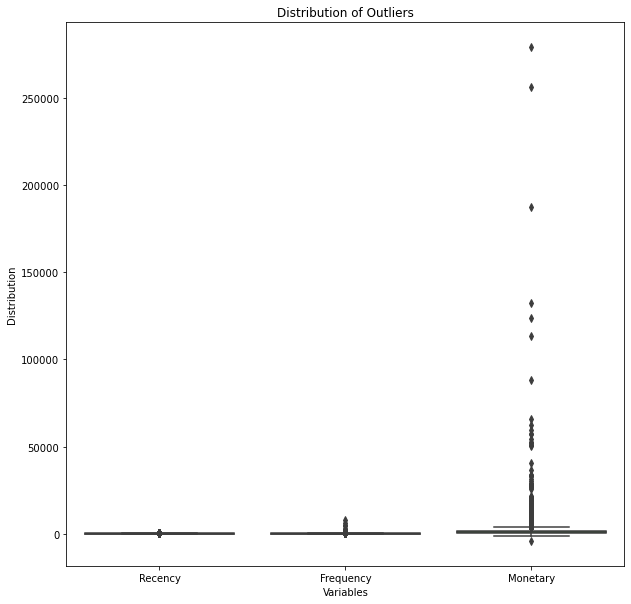

In [13]:
#plotting of outliers

params=['Recency','Frequency','Monetary']
plt.figure(figsize=(10,10))
sb.boxplot(data= RFM[params])
plt.title("Distribution of Outliers")
plt.ylabel("Distribution")
plt.xlabel("Variables")


From the above boxplot it ca be observed that there are outliers present in the dataset.

The existence of outliers in a dataset can possibly impact the outputs, therefore an imputation technique is used to replace the outliers with mean value.


In [14]:
#imputating outliers present in Monetary and Frequency

def imputing_Monetary(RFM):
    Q1= RFM['Monetary'].quantile(0.25)
    Q3= RFM['Monetary'].quantile(0.75)
    IQR= Q3-Q1
    upper= RFM['Monetary'][~(RFM['Monetary']>(Q3+1.5*IQR))].max()
    lower= RFM['Monetary'][~(RFM['Monetary']<(Q1-1.5*IQR))].min()
    RFM['Monetary']=np.where(RFM['Monetary']>upper, RFM['Monetary'].mean(),np.where(RFM['Monetary']<lower, RFM['Monetary'].mean(), RFM['Monetary']))
    return RFM['Monetary']
RFM['Monetary']= imputing_Monetary(RFM)

def imputing_Frequency(RFM):
    Q1= RFM['Frequency'].quantile(0.25)
    Q3= RFM['Frequency'].quantile(0.75)
    IQR= Q3-Q1
    upper= RFM['Frequency'][~(RFM['Frequency']>(Q3+1.5*IQR))].max()
    lower= RFM['Frequency'][~(RFM['Frequency']<(Q1-1.5*IQR))].min()
    RFM['Frequency']=np.where(RFM['Frequency']>upper, RFM['Frequency'].mean(),np.where(RFM['Frequency']<lower, RFM['Frequency'].mean(), RFM['Frequency']))
    return RFM['Frequency']
RFM['Frequency']= imputing_Frequency(RFM)

RFM.describe()

,CustomerID,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,91.047118,58.248228,956.081740
std,1722.390705,100.765435,51.200523,832.788014
min,12346.000000,0.000000,1.000000,-1592.490000
25%,13812.750000,16.000000,17.000000,293.952500
50%,15300.500000,49.000000,42.000000,648.550000
75%,16778.250000,142.000000,93.053294,1612.295000
max,18287.000000,373.000000,229.000000,3580.130000


Inorder to check whether the outliers are handled by imputations or not, a boxplot for all the three variables is plotted again.

Text(0.5, 0, 'Variables')

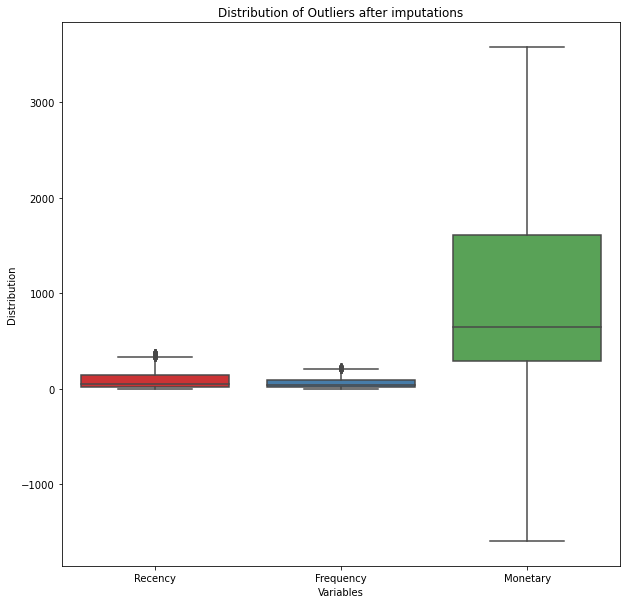

In [15]:
#plotting of outliers after imputations

params=['Recency','Frequency','Monetary']
plt.figure(figsize=(10,10))
sb.boxplot(data= RFM[params], palette="Set1")
plt.title("Distribution of Outliers after imputations")
plt.ylabel("Distribution")
plt.xlabel("Variables")

From the plot "Distribution of outliers after imputations" it can be observed that there are no outliers.

<u> K-MEANS CLUSTERING ALGORITHM </u>

After imputing the outliers the next step is to build the model. The desirable model should help in identifying the customers in different groups which helps in analyzing the business. For this the customers should initially be formed into groups based on the similarity factor among them. These groups are formed by using k-means clustering algorithm. 

By using k-means clustering, the customers are divided into different clusters depending on the similarity between the customer and the respective cluster. All the customers of a particualr cluster have similar factors. The number of clusters to be used in the model is decided by the elbow curve and silhouette coefficient.

The dataset from which the model is being build is an unsupervised dataset and needs the customers to be segmented into groups, hence k-means clustering algorithm is used for building the model. 

To start with k-means clustering, a random value of clusters is to be considered. In this case the initial number of clusters is considered as 5. 


In [16]:
#kmeans
kmeans=KMeans(n_clusters=5, random_state=2)
obtained_clusters=kmeans.fit_predict(RFM)
obtained_clusters

array([4, 1, 1, ..., 2, 3, 3])

The next step is to identify the optimal number of clusters k, for this the elbow method is used. In elbow method the avearge dispersion of data is plotted against the k- values. The point at which the average dispersion decreases the most is considered to be the optimal number of clusters k.

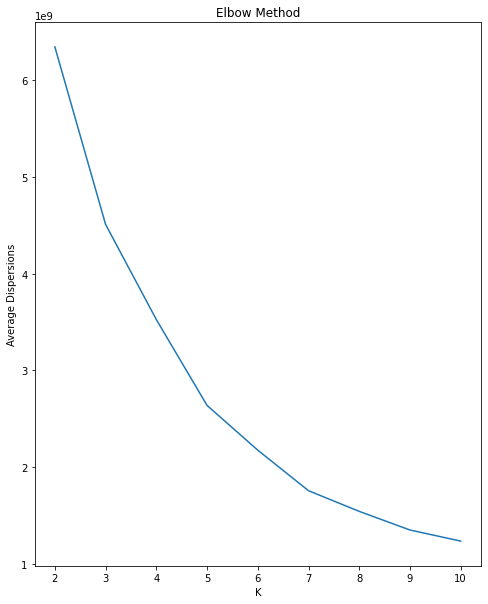

In [17]:
#elbow method plotting

avg_dispersions=[]
clusters_range= [2,3,4,5,6,7,8,9,10]
for cluster in clusters_range:
    kmean= KMeans(n_clusters=cluster, random_state=10)
    kmean.fit_predict(RFM)
    avg_dispersions.append(kmean.inertia_)

plt.figure(figsize=(8,10))
plt.plot(clusters_range, avg_dispersions)
plt.xlabel("K")
plt.ylabel("Average Dispersions")
plt.title("Elbow Method")
plt.show()

From the elbow method plot it is observed that the average dispersion has shown a slight decrease at k=3,5,7 but there is no steep decrease of average dispersion at any value of k. For this reason another method Silhouette Coefficient is used to obtain the optimal number of clusters.

Silhouette Coefficient is a clustering evaluation metric, in which if the group of clusters are well separated and compact then the value of Silhoutte coefficient would be high and that value of k indicates the optimal number of clusters to be considered.

In [18]:
#silhouette coefficient

clusters_range= [2,3,4,5,6,7,8,9,10]

def optimal_clusters(k,data):
    # intialise kmeans
    kmeans = KMeans(n_clusters=k, random_state=10)
    clusters=kmeans.fit_predict(RFM)  
    silhouette_coeff = silhouette_score(RFM, clusters)
    return silhouette_coeff

coeff_k= [optimal_clusters(k,RFM) for k in clusters_range]


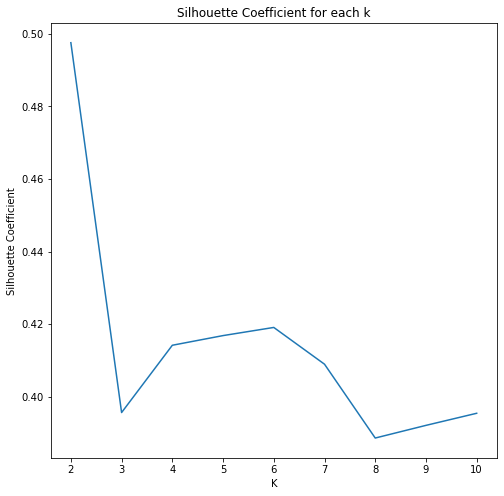

In [19]:
#silhouette coefficinet plotting

fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.plot(clusters_range, coeff_k)
plt.title("Silhouette Coefficient for each k")
plt.xlabel('K')
plt.ylabel('Silhouette Coefficient')
plt.show()

From the Silhouette Coefficient plot it is observed that the Silhouette coefficient is at it's peak at k=2 but since for clustering the minimum number of clusters required is 2, let us not consider this as k=2 is the minimal value. The next value of k at which the silhouette coefficient is more is at k=6. 

Hence the optimal number of clusters choosen is k=6.

<u>**RESULTS**</u>

Thus the final model is built with k=6 based on the Silhouette Coefficient plot.


In [20]:
#kmeans with k=6

kmeans= KMeans(n_clusters=6, random_state=50)
final_clusters= kmeans.fit(RFM)
final_clusters

KMeans(n_clusters=6, random_state=50)

The next step is to assign the obtained clusters to the customers inorder to identify which customer is present under which cluster.

In [21]:
#assigning clusters to the dataframe

RFM['Clusters']= kmeans.labels_
RFM

,CustomerID,Recency,Frequency,Monetary,Clusters
0,12346.0,325,2.000000,0.000000,1
1,12347.0,1,182.000000,1898.459701,4
2,12348.0,74,31.000000,1797.240000,4
3,12349.0,18,73.000000,1757.550000,4
4,12350.0,309,17.000000,334.400000,1
...,...,...,...,...,...
4367,18280.0,277,10.000000,180.600000,5
4368,18281.0,180,7.000000,80.820000,5
4369,18282.0,7,13.000000,176.600000,5
4370,18283.0,3,93.053294,2094.880000,2


To understand the clustering groups better, a boxplot for each of the factor under RFM is plotted. 
The below plot indicates the Recency factor of customers under each cluster group.

Text(0.5, 1.0, 'Classification of Customers_Recency')

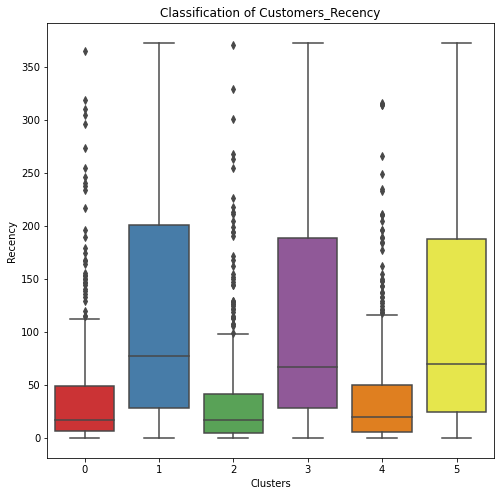

In [22]:
#plotting clusters for Recency

plt.figure(figsize=(8,8))
sb.boxplot(x="Clusters", y="Recency", data=RFM, palette="Set1")
plt.title("Classification of Customers_Recency")

From the "Classification of Customers_Recency" plot it is observed that the customers with recent purchases from the company are clustered under the clusters 1,3 and 5.

The next one is to plot the Frequency factor of customers under each cluster.

Text(0.5, 1.0, 'Classification of Customers_Frequency')

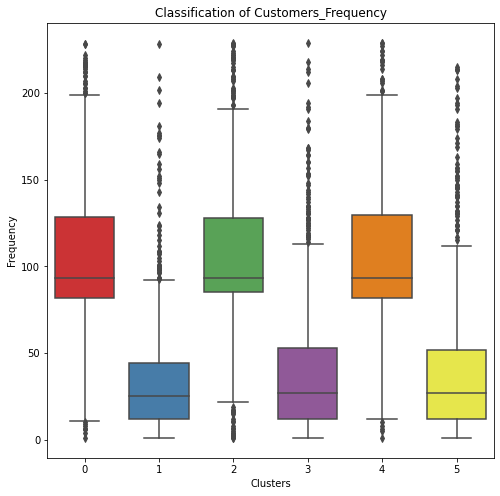

In [23]:
#plotting clusters for Frequency

plt.figure(figsize=(8,8))
sb.boxplot(x="Clusters", y="Frequency", data=RFM, palette="Set1")
plt.title("Classification of Customers_Frequency")

From the "Classification of Customers_Frequency" plot it is observed that the customers who are frequent buyers from the company are clustered mostly under cluster 0 and 4 followed by cluster 2.

The next one is to plot the Monetary factor of customers under each cluster.

Text(0.5, 1.0, 'Classification of Customers_Monetary')

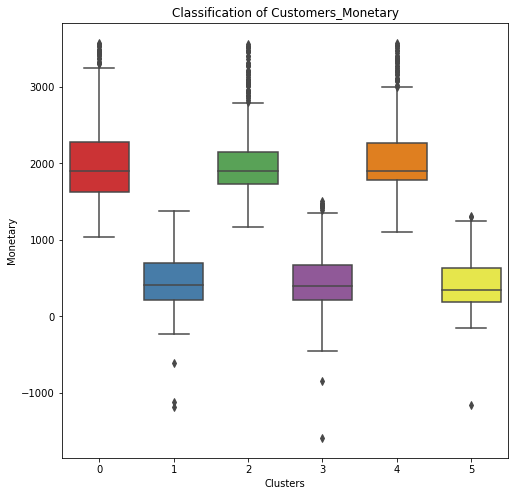

In [24]:
#plotting clusters for Monetary

plt.figure(figsize=(8,8))
sb.boxplot(x="Clusters", y="Monetary", data=RFM, palette="Set1")
plt.title("Classification of Customers_Monetary")

From the "Classification of Customers_Monetary" plot it is observed that the customers who has high purchase values from the company are clustered mostly under cluster 0 followed by cluster 4 and cluster 2.

<u>**CONCLUSION**</u>

In this project segmentation of customers is done for a company, so that based on the current situation of customers future marketing strategies can be developed inorder to increase the company value. To achieve this RFM analysis along with k-means clustering model is used, in which customers are divided into 3 categories based on the purchases made by them. In RFM analysis the customers are divided based on how recently(Recency), how often(Frequency) and how much amount of purchases made(Monetary). After applying the k-means clustering model from the three plots "Classification of Customers_Recency", "Classification of Customers_Frequency", "Classification of Customers_Monetary" it is observed that

1. Cluster 0 indicates the customers who are bought products from the company frequently as well as also includes customers who made high amount purchases.

2. Clusters 1, 3 and 5 indicates the customers who bought products from the company recently.

3. Clusters 2 and 4 identifies the customers who bought products frequently from the company along with cluster 0.

Based on this classification whenever the company wants to promote or change their marketing techniques it is important to study the group of customers they need to focus on. It can be done with these clusters for example inorder to study the latest preferences of customers, it can be obtained by studing the preferences of customers in cluster 1,3 and 5 and from cluster 0,2,4 one can identify the preferences/choices of customers who purchased products frequenlty. In case of high amount purchased products, in this company one needs to study the clusters 0,2,4 as from "Classification of Customers_Monetary" plot it is observed that these clusters has greater proportion of customers with high amount purchases.


<u>**REFERENCES**</u>

1. https://www.kaggle.com/code/hellbuoy/online-retail-k-means-hierarchical-clustering

2. https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

3. https://www.putler.com/rfm-analysis/

4. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

5. https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/

6. https://en.wikipedia.org/wiki/Silhouette_(clustering)